In [1]:
train_df = pd.read_csv("train.csv", parse_dates=['Dates'])
train_df['month'] = train_df['Dates'].map(lambda x : x.month)
train_df['hour'] = train_df['Dates'].map(lambda x : x.hour)
train_df.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,hour
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,1,0
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,1,0
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,1,0
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,1,0
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212,1,0


In [2]:
train_df['event'] = 1

#### Dates, Descript, Resolution 제거

In [3]:
train_df.drop(columns=['Dates','Descript','Resolution'], inplace=True)
train_df.tail()

,Category,DayOfWeek,PdDistrict,Address,X,Y,month,hour,event
878044,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,1,0,1
878045,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,1,0,1
878046,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,1,0,1
878047,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,1,0,1
878048,FORGERY/COUNTERFEITING,Monday,BAYVIEW,1800 Block of NEWCOMB AV,-122.394926,37.738212,1,0,1


### 위도 90도 제거

In [4]:
train_df = train_df[train_df['Y'] != 90.0]
train_df.reset_index(drop=True, inplace=True)
train_df.tail()

,Category,DayOfWeek,PdDistrict,Address,X,Y,month,hour,event
877977,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,1,0,1
877978,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,1,0,1
877979,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,1,0,1
877980,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,1,0,1
877981,FORGERY/COUNTERFEITING,Monday,BAYVIEW,1800 Block of NEWCOMB AV,-122.394926,37.738212,1,0,1


In [5]:
train_df.Category.nunique()

39

### Block 변수추가

In [6]:
train_df["Block"] = np.array([1 if "Block" in value else 0 for value in train_df.Address.values])
train_df["Block"].unique()

array([0, 1], dtype=int64)

In [7]:
event_by_Block = train_df[['Block','event']].groupby("Block").count().reset_index()
event_by_Block

,Block,event
0,0,260751
1,1,617231


Address에 Block단어가 들어갔을 때와 안들어갔을 때의 범죄발생횟수가 차이를 보인다.

In [23]:
block_Category = train_df[['Category','Block','event']].groupby(['Category','Block']).count().reset_index()
block_Category_pivot = block_Category.pivot(index='Category',columns="Block",values='event')
block_Category_pivot

Block,0,1
Category,,
ARSON,249.0,1264.0
ASSAULT,15426.0,61446.0
BAD CHECKS,21.0,385.0
BRIBERY,38.0,251.0
BURGLARY,438.0,36316.0
DISORDERLY CONDUCT,1264.0,3054.0
DRIVING UNDER THE INFLUENCE,1417.0,851.0
DRUG/NARCOTIC,19919.0,34052.0
DRUNKENNESS,1397.0,2883.0


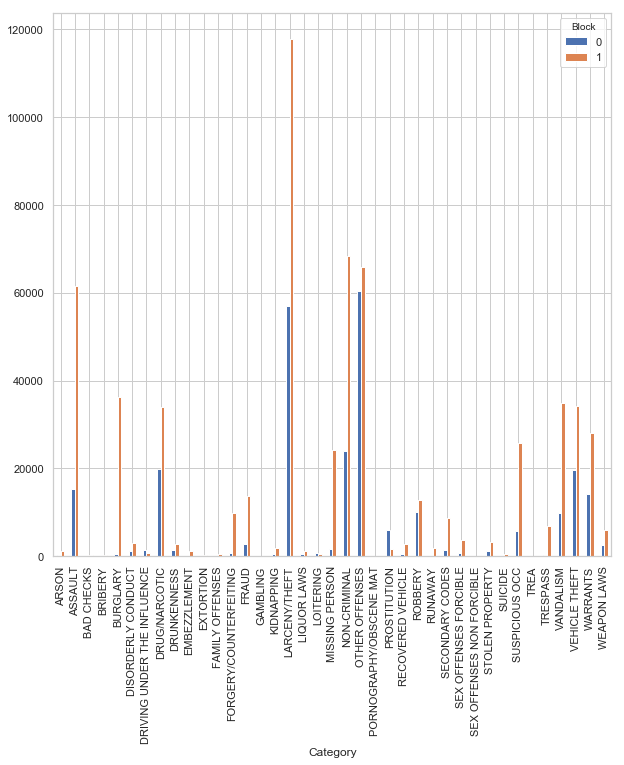

In [25]:
block_Category_pivot.plot.bar(figsize=(10,10))

### 휴일 추가

In [12]:
train_df["Weekend"] = np.array([1 if value == "Saturday" or value == "Sunday" else 0 for value in train_df.DayOfWeek.values])

In [13]:
train_df["Weekend"].unique()

array([0, 1], dtype=int64)

In [14]:
event_by_weekend = train_df[['Weekend','event']].groupby("Weekend").count().reset_index()
event_by_weekend

,Weekend,event
0,0,634477
1,1,243505


휴일보다는 평일이 더 많이 일어난다.

In [20]:
weekend_Category = train_df[['Weekend','Category','event']].groupby(['Category','Weekend']).count().reset_index()
weekend_Category_pivot = weekend_Category.pivot(index="Category", columns="Weekend", values='event')
weekend_Category_pivot

Weekend,0,1
Category,,
ARSON,1082,431
ASSAULT,52795,24077
BAD CHECKS,341,65
BRIBERY,206,83
BURGLARY,27769,8985
DISORDERLY CONDUCT,3108,1210
DRIVING UNDER THE INFLUENCE,1369,899
DRUG/NARCOTIC,41438,12533
DRUNKENNESS,2634,1646


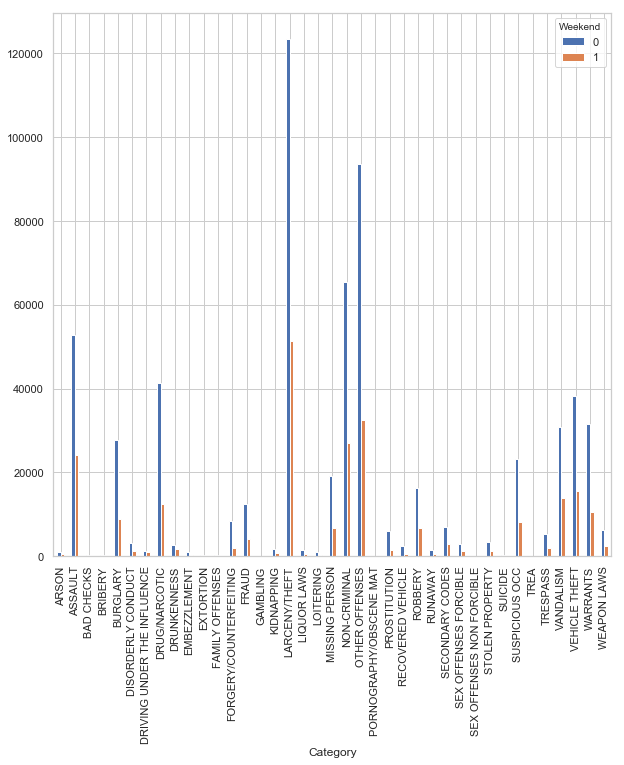

In [22]:
weekend_Category_pivot.plot.bar(figsize=(10,10))

### 독립변수 one-hot encoding

In [31]:
df = train_df.copy()
x0 = pd.get_dummies(df[['DayOfWeek','PdDistrict','month','hour']], columns=['DayOfWeek','PdDistrict','month','hour'])
x = pd.concat([df[['Weekend','Block']], x0], axis=1)

,Weekend,Block,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_BAYVIEW,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
877977,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
877978,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
877979,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
877980,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
877981,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.preprocessing import LabelEncoder

In [35]:
y = LabelEncoder().fit_transform(df[['Category']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Modeling

In [1]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss,confusion_matrix, classification_report, accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
n_class = np.unique(y)
n_class

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38], dtype=int64)

In [45]:
model_xgb = xgb.XGBClassifier(objective="multi:softmax")

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [50]:
xg_train = xgb.DMatrix(x_train, label=y_train)
xg_test = xgb.DMatrix(x_test, label=y_test)

In [56]:
param = {}
param['n_estimators'] = 1000
param['objective'] = "multi:softmax"
param["max_depth"] = 3
param['num_class'] = 39
param['n_jobs'] = 3

In [52]:
watch_list = [(xg_train, 'train'),(xg_test, 'test')]

In [57]:
bst = xgb.train(param, xg_train, evals=watch_list)

[21:54:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:54:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:54:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:55:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:55:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:55:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_d

[21:55:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:55:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:55:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:55:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:55:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-merror:0.773483	test-merror:0.772146
[21:55:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:55:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:55:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:55:44] src/tree/updater_prune.cc:74: tree pruning end

[21:56:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:56:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:56:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[21:56:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:56:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:56:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:56:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:56:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:56:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_dep

[21:57:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:57:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:57:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:57:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:57:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:57:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:57:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:57:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[21:57:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_de

[21:58:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:58:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:58:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:58:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:58:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:58:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:58:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:58:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[21:58:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_d

[21:59:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[21:59:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:59:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:59:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:59:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:59:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:59:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:59:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:59:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_de

In [59]:
predict = bst.predict(xg_test)

In [64]:
confusion_matrix(y_test, predict)

array([[  0,  27,   0, ...,   4,   0,   0],
       [  0, 760,   0, ..., 205,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0, 337,   0, ..., 324,   0,   0],
       [  0, 143,   0, ...,  39,   0,   0],
       [  0,  82,   0, ...,  23,   0,   0]], dtype=int64)

In [65]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       393
          1       0.17      0.04      0.06     19113
          2       0.00      0.00      0.00       101
          3       0.00      0.00      0.00        77
          4       0.00      0.00      0.00      9245
          5       0.16      0.03      0.06      1032
          6       0.00      0.00      0.00       537
          7       0.23      0.31      0.26     13645
          8       0.00      0.00      0.00      1070
          9       0.00      0.00      0.00       282
         10       0.00      0.00      0.00        66
         11       0.00      0.00      0.00       119
         12       0.00      0.00      0.00      2587
         13       0.00      0.00      0.00      4073
         14       0.00      0.00      0.00        36
         15       0.00      0.00      0.00       565
         16       0.22      0.83      0.35     43795
         17       0.00      0.00      0.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 복합 샘플링

In [66]:
from imblearn.combine import *